In [134]:
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

In [135]:
# Read a PGM Image and return image matrix and its initials separately
def read_pgm(image_file):
    with open(image_file, 'r') as file:
        image = file.read().splitlines()
    for pixel in range(3,len(image)):
        image[pixel] = int(image[pixel])
    image_matrix = np.array(image[4:]).reshape(int(image[2].split()[1]),int(image[2].split()[0]))
    return (image_matrix, image[:4])

In [136]:
# Define Zero Padding
def zero_padding(image_matrix, width):
    padded_matrix = np.zeros((image_matrix.shape[0]+2*width,image_matrix.shape[1]+2*width))   
    padded_matrix[width:-width, width:-width] = image_matrix    
    return padded_matrix

In [137]:
# Define convolution Operation 
def convolution(image_matrix, kernel = np.array([[0,0,0],[0,1,0],[0,0,0]])):
    k = (kernel.shape[0]-1)//2
    padded_image_matrix = zero_padding(image_matrix, k)
    filtered_matrix = np.zeros((image_matrix.shape[0], image_matrix.shape[1]), dtype=int)
    progress = 0
    print('convolution progress (in %)...')
    for i in range(k,padded_image_matrix.shape[0]-k):
        for j in range(k,padded_image_matrix.shape[1]-k):
            progress = progress +1
            if progress%10 == 0:           
                print(round(progress/image_matrix.size*100,2), end='\r')
            filtered_matrix[i-k,j-k] = int(np.sum((padded_image_matrix[i-k:i+k+1,j-k:j+k+1]*kernel)))
    return filtered_matrix

In [138]:
# Write PGM Image from matrix.
def matrix2pgm(image_matrix,initial,output_image_file_name = str(np.random.randint(1,100000000000)) + '_default.pgm'):    
    with open(output_image_file_name, 'w') as file:
        file.writelines("% s\n" % pixel for pixel in initial)
        file.writelines("% s\n" % int(abs(pixel)) for pixel in image_matrix.flatten())

In [7]:
# Identity Kernel
def identity_kernel(size=3):
    zero = np.zeros((size,size))
    zero[size//2,size//2] = 1
    return zero

In [8]:
# Gaussian Kernel
def gauss_kernel(size=3,sigma=1):
    center=(size//2)
    kernel=np.zeros((size,size))
    for i in range(size):
       for j in range(size):
          diff=np.sqrt((i-center)**2+(j-center)**2)
          kernel[i,j]=np.exp(-(diff**2)/(2*sigma**2))
    return kernel/np.sum(kernel)

### Blurring Image with Gaussian Kernel

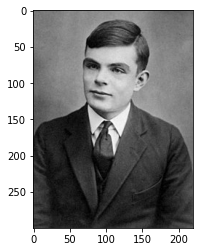

In [8]:
image = read_pgm('Alan_Turing.pgm')
plt.imshow(image[0])

convolution progress (in %)...


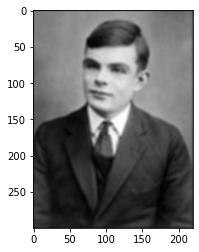

In [9]:
kernelG = gauss_kernel(5,3.3)
filtered_matrix = convolution(image[0], kernelG)
plt.imshow(filtered_matrix)
matrix2pgm(filtered_matrix,image[1],output_image_file_name = 'blured_Alan.pgm')

### Bokeh Blurring

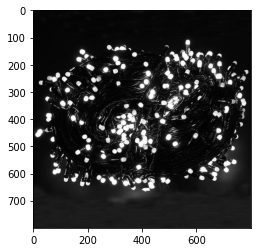

In [145]:
image = read_pgm('light.pgm')
plt.imshow(image[0])

In [146]:
def bokeh_kernel(size=9):
    f = []
    f.append(np.zeros(size, dtype=int))
    for i in range(size//2):
        l = np.zeros(size, dtype=int)
        l[size//2-i:size//2+i+1]=1
        f.append(l)
    c = f[:-1]
    c.reverse()
    b = np.array(f+c)
    return np.array(b/np.sum(b))

convolution progress (in %)...


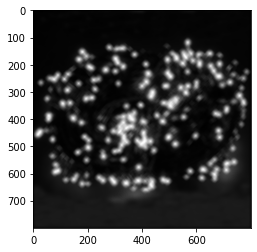

In [147]:
filtered_matrix = convolution(image[0], bokeh_kernel(25))
plt.imshow(filtered_matrix)
matrix2pgm(filtered_matrix,image[1],output_image_file_name = 'bokeh_light.pgm')

### Outline detection using Sobel Method

In [10]:
# Vertical Sobel Kernel
sobel_v = np.array([[-0.25,0.00,0.25],[-0.50,0.00,0.50],[-0.25,0.00,0.25]])
# Horizontal Sobel Kernel
sobel_h = sobel_v.transpose()

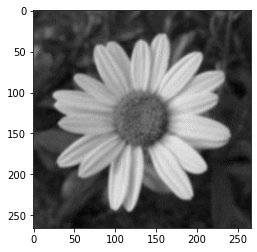

In [11]:
image = read_pgm('flower.pgm')
image_matrix = image[0]
initials = image[1]
plt.imshow(image_matrix)

convolution progress (in %)...


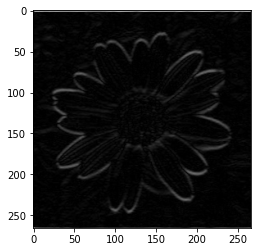

In [12]:
# Horizontal Outlines of image
image_sobel_h = convolution(image_matrix, sobel_h )
image_sobel_h  = np.abs(image_sobel_h)
plt.imshow(image_sobel_h)

convolution progress (in %)...


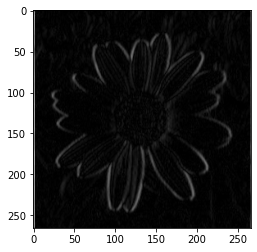

In [13]:
# Vertical Outlines of image
image_sobel_v = convolution(image_matrix, sobel_v )
image_sobel_v = np.abs(image_sobel_v)
plt.imshow(image_sobel_v)

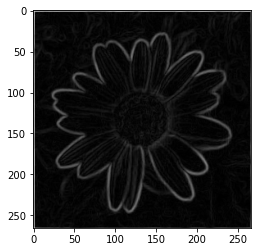

In [14]:
# Applying gradient on horizontal and vertical outlines
sobel_gradient = np.sqrt(image_sobel_h**2 + image_sobel_v**2)
plt.imshow(sobel_gradient)
matrix2pgm(sobel_gradient,initials,'sobel_gradient_flower.pgm')

### Sharpen an Image

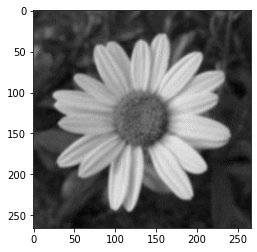

In [15]:
image = read_pgm('flower.pgm')
image_matrix = image[0]
plt.imshow(image_matrix)

convolution progress (in %)...


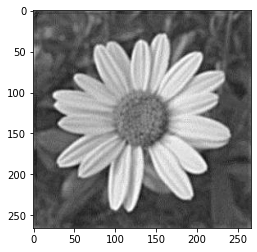

In [16]:
# Sharpened Image
filtered_matrix = convolution(image_matrix, gauss_kernel(9,7))
filtered_matrix = 2*image_matrix-filtered_matrix
filtered_matrix[filtered_matrix>255]=255
plt.imshow(filtered_matrix)
matrix2pgm(filtered_matrix,image[1],output_image_file_name = 'sharpened_flower.pgm')